In [6]:
from vis.utils import utils
from keras.models import load_model
from keras import activations
from matplotlib import pyplot as plt
%matplotlib inline
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations
from keras.preprocessing.image import list_pictures, load_img, img_to_array

In [31]:
nb_images = 10

### モデルの読み込み

In [42]:
linear_model = load_model('ex1/model.h5')
linear_model.load_weights('dataset/results/finetuning.h5')
pred_model = load_model('ex1/model.h5')
pred_model.load_weights('dataset/results/finetuning.h5')

### 最終レイヤーを差し替え

In [43]:
linear_model.layers[-1].activation = activations.linear
linear_model = utils.apply_modifications(linear_model)

### 画像の読み込み

In [44]:
X = []
labels = []
predict_dir = 'predict_picture/'
for picture in list_pictures(predict_dir):
        img = load_img(picture, target_size=(200, 200))
        img = img_to_array(img)
        X.append(img)
        labels.append(1 if picture.find('tumorM') > -1 else 0)
        
X = X[:nb_images]
labels = labels[:nb_images]

### ヒートマップを描画

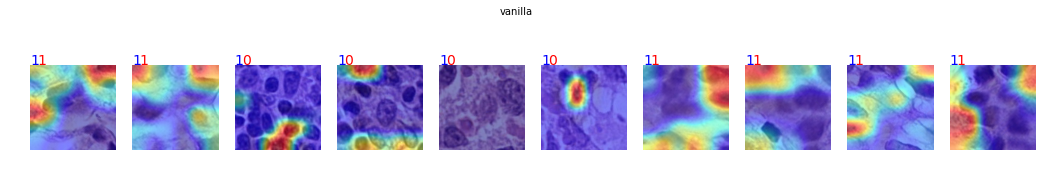

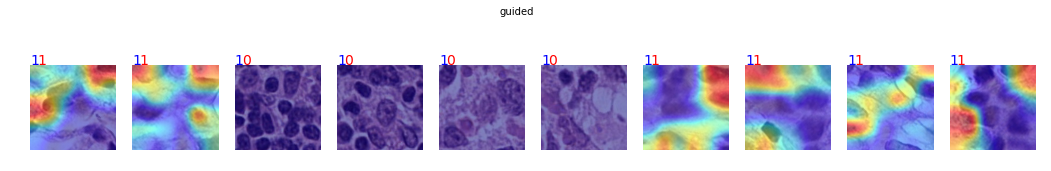

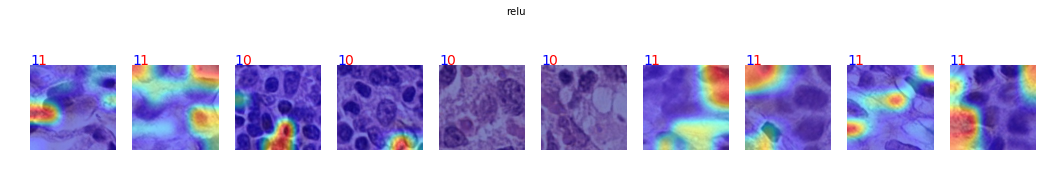

In [54]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, nb_images, figsize=(18, 3))
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, (img, label) in enumerate(zip(X, labels)):    
        grads = visualize_cam(linear_model, -1, filter_indices=label, 
                              seed_input=img, backprop_modifier=modifier)
        jet_heatmap = np.uint8(grads)

        # 予測値
        pred = pred_model.predict(img[np.newaxis,:,:,:])[0].argmax()
        
        ax[i].axis('off')
        ax[i].imshow(overlay(jet_heatmap, img))
        ax[i].text(16, -3, label, fontsize=14, color='red')
        ax[i].text(0, -3, pred, fontsize=14, color='blue')